# 2. Feature Engineering

The model in section 1 does not seem very interesting, attempt to use the following nodes to improve the model:

Nodes:

Links:


In [1]:
import pandas as pd

from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.factors.discrete import TabularCPD, DiscreteFactor
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork

from sklearn.metrics import classification_report, confusion_matrix


## 1.1 Data Preparation & Cleaning

### 1.1.1 Load Source Date

In [2]:
# load the source data
df_source = pd.read_csv('data/raw/DataCoSupplyChainDataset.csv', encoding='unicode_escape')
df_source.drop_duplicates(inplace=True)

print(df_source.shape)
with pd.option_context('display.max_columns', None):
    display(df_source.head())

(180519, 53)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## 1.2 Data Visualization & Analysis

<AxesSubplot: >

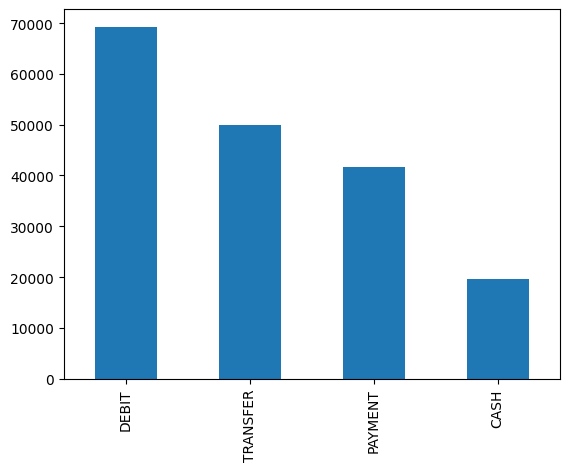

In [3]:
# payment type
df_source['Type'].value_counts().plot(kind='bar')

<AxesSubplot: >

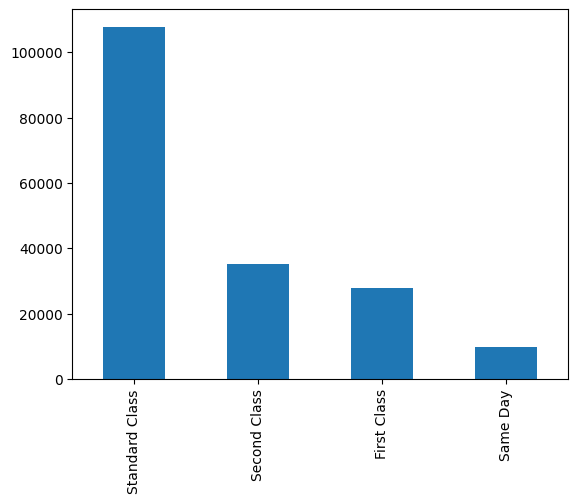

In [4]:
# shipping mode
df_source['Shipping Mode'].value_counts().plot(kind='bar')

<AxesSubplot: >

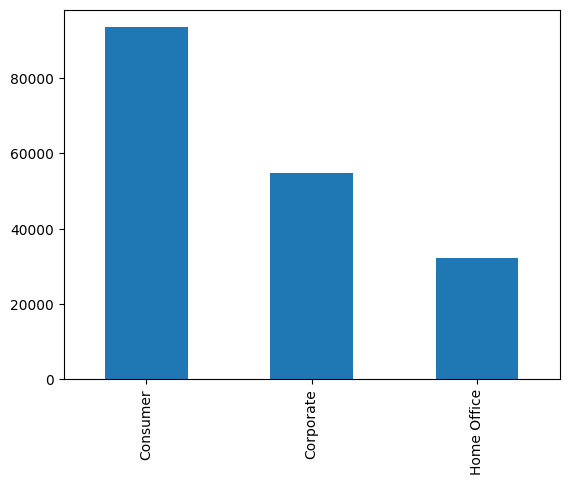

In [5]:
# customer segment
df_source['Customer Segment'].value_counts().plot(kind='bar')

<AxesSubplot: >

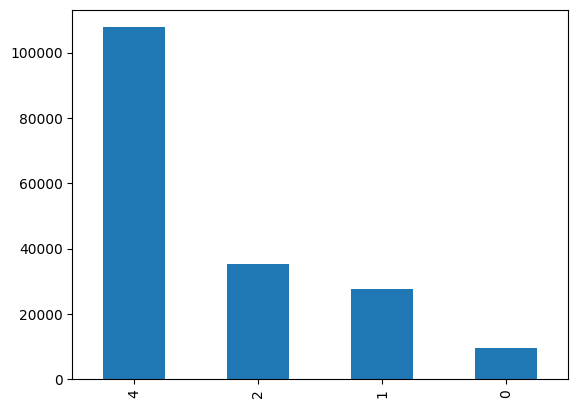

In [6]:
# Days for shipment (scheduled)
df_source['Days for shipment (scheduled)'].value_counts().plot(kind='bar')

<AxesSubplot: >

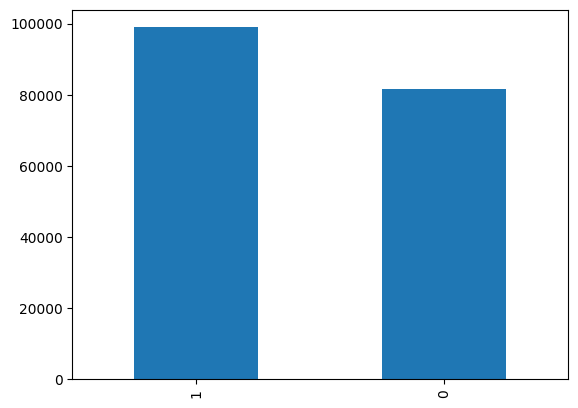

In [7]:
# Late_delivery_risk
df_source['Late_delivery_risk'].value_counts().plot(kind='bar')

In [8]:
# Customer State
customer_state_vc = df_source['Customer State'].value_counts()

print(f'Number of states: {len(customer_state_vc)}')
print(customer_state_vc)

Number of states: 46
PR       69373
CA       29223
NY       11327
TX        9103
IL        7631
FL        5456
OH        4095
PA        3824
MI        3804
NJ        3191
AZ        3026
GA        2503
MD        2415
NC        1992
CO        1914
VA        1849
OR        1668
MA        1607
TN        1582
NV        1440
MO        1354
HI        1248
CT        1094
UT         968
NM         949
LA         948
WA         920
WI         850
MN         672
SC         665
IN         581
DC         579
KY         487
KS         458
DE         269
RI         243
WV         241
OK         232
ND         215
ID         167
AR         164
MT          87
IA          67
AL          35
95758        2
91732        1
Name: Customer State, dtype: int64


<AxesSubplot: >

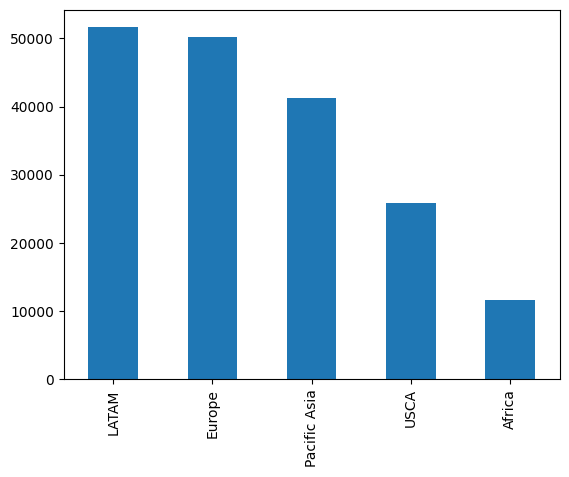

In [9]:
# market
df_source['Market'].value_counts().plot(kind='bar')

> - A question could be which store is most likely to have a late delivery risk?
> - which store does not deliver to the market

In [10]:
# State to which the store where the purchase is registered belongs
df_source[df_source['Market'] == 'Africa']['Customer State'].value_counts()

PR    4198
CA    1812
NY     753
TX     657
IL     500
FL     379
PA     310
OH     275
MI     207
GA     202
AZ     198
NJ     196
CO     152
OR     145
MD     139
VA     136
NC     115
MO     112
MA     106
HI      92
NM      89
TN      87
NV      69
WI      68
LA      67
IN      67
WA      65
SC      55
MN      54
CT      43
DC      43
UT      42
KY      27
WV      27
KS      24
DE      24
AR      17
ND      17
RI      15
AL      10
OK      10
ID       5
IA       3
MT       2
Name: Customer State, dtype: int64

In [11]:
# customer city
customer_city_vc = df_source['Customer City'].value_counts()
customer_city_vc

Caguas         66770
Chicago         3885
Los Angeles     3417
Brooklyn        3412
New York        1816
               ...  
Bartlett          25
Malden            22
Ponce             22
Freehold          13
CA                 3
Name: Customer City, Length: 563, dtype: int64

## 1.3 Feature Engineering

Select the columns that will be used as the network nodes and remove duplicate records to have a single record per order.

In [12]:
nodes = [
    'Order Id',
    'Type',
    'Shipping Mode',
    'Customer Segment',
    'Days for shipment (scheduled)',
    'Late_delivery_risk',
    'Customer State',
    'Customer City',
    'Market',
]

df_data = df_source[nodes] \
    .rename(columns={
        'Type': 'Payment Type',
        'Customer State': 'Store State',
        'Customer City': 'Store City'}) \
    .drop_duplicates() \
    .reset_index(drop=True)


print(df_data.shape)
with pd.option_context('display.max_columns', None):
    display(df_data.head())

(65752, 9)


,Order Id,Payment Type,Shipping Mode,Customer Segment,Days for shipment (scheduled),Late_delivery_risk,Store State,Store City,Market
0,77202,DEBIT,Standard Class,Consumer,4,0,PR,Caguas,Pacific Asia
1,75939,TRANSFER,Standard Class,Consumer,4,1,PR,Caguas,Pacific Asia
2,75938,CASH,Standard Class,Consumer,4,0,CA,San Jose,Pacific Asia
3,75937,DEBIT,Standard Class,Home Office,4,0,CA,Los Angeles,Pacific Asia
4,75936,PAYMENT,Standard Class,Corporate,4,0,PR,Caguas,Pacific Asia


In [13]:
# find columns with missing values
df_data.isnull().sum()

Order Id                         0
Payment Type                     0
Shipping Mode                    0
Customer Segment                 0
Days for shipment (scheduled)    0
Late_delivery_risk               0
Store State                      0
Store City                       0
Market                           0
dtype: int64

### 1.3.1 Create a Training and Test Set

In [14]:
random_state = 98421

In [15]:
# create the training dataset
df_test = df_data.sample(frac=0.3, random_state=random_state)
df_train = df_data.drop(df_test.index)

# reset the index of both datasets
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

print(f'Training dataset shape : {df_train.shape}')
print(f'Test dataset shape     : {df_test.shape}')

Training dataset shape : (46026, 9)
Test dataset shape     : (19726, 9)


## 1.4 Model Training

### 1.4.1 Model Definition

Define the model nodes and edges.

In [16]:
# Create the Bayesian network model
model = BayesianNetwork()

# Add the nodes to the model
model.add_node('Payment Type')
model.add_node('Shipping Mode')
model.add_node('Customer Segment')
model.add_node('Days for shipment (scheduled)')
model.add_node('Late_delivery_risk')
model.add_node('Store State')
model.add_node('Store City')
model.add_node('Market')

# Add the edges between the nodes to the model
model.add_edge('Payment Type', 'Late_delivery_risk')
model.add_edge('Shipping Mode', 'Late_delivery_risk')
model.add_edge('Customer Segment', 'Late_delivery_risk')
model.add_edge('Days for shipment (scheduled)', 'Late_delivery_risk')
model.add_edge('Store State', 'Store City')
model.add_edge('Store City', 'Late_delivery_risk')
model.add_edge('Market', 'Late_delivery_risk')

### 1.4.2 Compute the Probability Distribution Table (PDT)

In [17]:
model.fit(
    data=df_train, 
    estimator=BayesianEstimator)

In [18]:
# Check if the model is valid
model.check_model()

True

In [19]:
model_cpds = model.get_cpds()
model_cpds

[<TabularCPD representing P(Payment Type:4) at 0x7f03f5db44f0>,
 <TabularCPD representing P(Shipping Mode:4) at 0x7f03f5c3edc0>,
 <TabularCPD representing P(Customer Segment:3) at 0x7f03f5db45b0>,
 <TabularCPD representing P(Days for shipment (scheduled):4) at 0x7f03f5c46310>,
 <TabularCPD representing P(Late_delivery_risk:2 | Customer Segment:3, Days for shipment (scheduled):4, Market:5, Payment Type:4, Shipping Mode:4, Store City:563) at 0x7f03f6c69eb0>,
 <TabularCPD representing P(Store State:46) at 0x7f03f5db47c0>,
 <TabularCPD representing P(Store City:563 | Store State:46) at 0x7f03f5c3eeb0>,
 <TabularCPD representing P(Market:5) at 0x7f03f5c3ef40>]

In [20]:
for cpd in model_cpds:
    print(f'--- {cpd.variable} ---')
    print(cpd.values, end='\n\n')

--- Payment Type ---
[0.11038756 0.38329061 0.22954639 0.27677543]

--- Shipping Mode ---
[0.15279377 0.05323043 0.19539549 0.5985803 ]

--- Customer Segment ---
[0.5209243  0.29979072 0.17928497]

--- Days for shipment (scheduled) ---
[0.05323043 0.15279377 0.19539549 0.5985803 ]

--- Late_delivery_risk ---
[[[[[[[5.00000000e-01 5.00000000e-01 5.00000000e-01 ...
       5.00000000e-01 5.00000000e-01 5.00000000e-01]
      [5.00000000e-01 5.00000000e-01 5.00000000e-01 ...
       5.00000000e-01 5.00000000e-01 5.00000000e-01]
      [5.00000000e-01 5.00000000e-01 5.00000000e-01 ...
       5.00000000e-01 5.00000000e-01 5.00000000e-01]
      [5.00000000e-01 5.00000000e-01 5.00000000e-01 ...
       5.00000000e-01 5.00000000e-01 5.00000000e-01]]

     [[5.00000000e-01 5.00000000e-01 5.00000000e-01 ...
       5.00000000e-01 5.00000000e-01 5.00000000e-01]
      [5.00000000e-01 5.00000000e-01 5.00000000e-01 ...
       5.00000000e-01 4.62547527e-06 5.00000000e-01]
      [5.00000000e-01 5.00000000e-

## 1.5 Model Details

In [21]:
model.active_trail_nodes('Late_delivery_risk')

{'Late_delivery_risk': {'Customer Segment',
  'Days for shipment (scheduled)',
  'Late_delivery_risk',
  'Market',
  'Payment Type',
  'Shipping Mode',
  'Store City',
  'Store State'}}

In [22]:
model.get_independencies()

(Shipping Mode ⟂ Store City, Days for shipment (scheduled), Market, Store State, Customer Segment, Payment Type)
(Shipping Mode ⟂ Days for shipment (scheduled), Market, Store State, Customer Segment, Payment Type | Store City)
(Shipping Mode ⟂ Store City, Market, Store State, Customer Segment, Payment Type | Days for shipment (scheduled))
(Shipping Mode ⟂ Store City, Days for shipment (scheduled), Store State, Customer Segment, Payment Type | Market)
(Shipping Mode ⟂ Store City, Days for shipment (scheduled), Market, Customer Segment, Payment Type | Store State)
(Shipping Mode ⟂ Store City, Days for shipment (scheduled), Market, Store State, Payment Type | Customer Segment)
(Shipping Mode ⟂ Store City, Days for shipment (scheduled), Market, Store State, Customer Segment | Payment Type)
(Shipping Mode ⟂ Payment Type, Market, Store State, Customer Segment | Store City, Days for shipment (scheduled))
(Shipping Mode ⟂ Payment Type, Days for shipment (scheduled), Customer Segment, Store Sta

## 1.6 Model Queries

In [23]:
infer = VariableElimination(model)

### 1.6.1 What is the probability of a late delivery?

In [24]:
prob_lat_del_risk = infer.query(
    variables=['Late_delivery_risk'],
    joint=False)

print(prob_lat_del_risk['Late_delivery_risk'])

+-----------------------+---------------------------+
| Late_delivery_risk    |   phi(Late_delivery_risk) |
+=======================+===========================+
| Late_delivery_risk(0) |                    0.5198 |
+-----------------------+---------------------------+
| Late_delivery_risk(1) |                    0.4802 |
+-----------------------+---------------------------+


### 1.6.2 What is the state most likely to be the cause of late delivery?

In [25]:
def get_probabilities(probabilities: DiscreteFactor) -> pd.DataFrame:
    """
    Show probabilities for a given variable.

    Parameters
    ----------
    probabilities : DiscreteFactor
        Probabilities for the variable.

    Returns
    -------
    pd.DataFrame
        Probabilities for the variable.
    """
    # Get the probabilities for each value
    value_probabilities = probabilities.values
    variable_name = list(probabilities.state_names.keys())[0]
    state_names = probabilities.state_names[variable_name]

    # create a dataframe with the probabilities
    return pd.DataFrame(
        data=value_probabilities,
        index=state_names,
        columns=['Probability']) \
        .sort_values(by='Probability', ascending=False)

In [26]:
# Query the probability of a late delivery for each state
state_late_delivery = infer.query(
    variables=['Store State'],
    evidence={'Late_delivery_risk': 1})

get_probabilities(state_late_delivery).head(5)

,Probability
PR,0.383701
CA,0.162564
NY,0.062268
TX,0.050877
IL,0.041325


### 1.6.2 Which Market is most likely to have a late delivery?

In [27]:
# Which Market is most likely to have a late delivery?
market_late_delivery = infer.query(
    variables=['Market'],
    evidence={'Late_delivery_risk': 1})

get_probabilities(market_late_delivery).head(5)


,Probability
Europe,0.283047
Pacific Asia,0.268420
LATAM,0.258144
USCA,0.130908
Africa,0.059480


#### 1.6.2.1 Which shipping method is most likely to have a late delivery in the Pacific Asia Market?

In [47]:
# Which shipping method is most likely to have a late delivery in the Pacific Asia Market?
shipping_mode_late_delivery = infer.query(
    variables=['Shipping Mode'],
    evidence={
        'Late_delivery_risk': 1,
        'Market': 'Pacific Asia'
    })

get_probabilities(shipping_mode_late_delivery).head(5)

,Probability
Standard Class,0.555195
Second Class,0.217160
First Class,0.172248
Same Day,0.055397


### 1.6.3 Which customer segment is most likely to have a late delivery

In [29]:
customer_segment_late_delivery = infer.query(
    variables=['Customer Segment'],
    evidence={
        'Late_delivery_risk': 1,
    })

get_probabilities(customer_segment_late_delivery).head(5)

,Probability
Consumer,0.519776
Corporate,0.299223
Home Office,0.181002


### 1.6.3.1 Which shipping method is most likely to have a late delivery in the Corporate segment?

In [30]:
customer_segment_late_delivery = infer.query(
    variables=['Shipping Mode'],
    evidence={
        'Late_delivery_risk': 1,
        'Customer Segment': 'Corporate'
    })

get_probabilities(customer_segment_late_delivery).head(5)

,Probability
Standard Class,0.555504
Second Class,0.217041
First Class,0.172012
Same Day,0.055443


### 1.6.4 Which payment type should I use to avoid late delivery?

In [31]:
payment_type_late_delivery = infer.query(
    variables=['Payment Type'],
    evidence={
        'Late_delivery_risk': 0,
    })

get_probabilities(payment_type_late_delivery).head(5)

,Probability
DEBIT,0.379077
TRANSFER,0.285255
PAYMENT,0.226642
CASH,0.109026


#### 1.6.4.1 If I am a Consumer in Africa who wants to save cost on delivery, which payment type should I use to avoid late delivery?

In [32]:
payment_type_late_delivery = infer.query(
    variables=['Payment Type'],
    evidence={
        'Late_delivery_risk': 0,
        'Customer Segment': 'Consumer',
        'Market': 'Africa',
        'Shipping Mode': 'Standard Class'
    })

get_probabilities(payment_type_late_delivery).head(5)

,Probability
DEBIT,0.380729
TRANSFER,0.287780
PAYMENT,0.226078
CASH,0.105413


#### 1.6.4.2 Which city should I be buying from to avoid late delivery?

In [33]:
payment_type_late_delivery = infer.query(
    variables=['Store City'],
    evidence={
        'Payment Type': 'DEBIT',
        'Late_delivery_risk': 0,
        'Customer Segment': 'Consumer',
        'Market': 'Africa',
        'Shipping Mode': 'Standard Class'
    })

get_probabilities(payment_type_late_delivery).head(5)

,Probability
Caguas,0.390051
Chicago,0.025284
Los Angeles,0.019455
Brooklyn,0.014026
San Diego,0.011498


#### 1.6.4.3 What if I was a corporate customer?

In [34]:
payment_type_late_delivery = infer.query(
    variables=['Store City'],
    evidence={
        'Payment Type': 'CASH',
        'Late_delivery_risk': 0,
        'Customer Segment': 'Corporate',
        'Market': 'Africa',
        'Shipping Mode': 'Standard Class'
    })

get_probabilities(payment_type_late_delivery).head(5)

,Probability
Caguas,0.342272
Chicago,0.034942
Brooklyn,0.019681
Los Angeles,0.019008
New York,0.010189


## 1.7 Model Evaluation

In [35]:
# remove the label to predict
df_eval = df_test \
    .drop_duplicates() \
    .reset_index(drop=True)

df_eval.head()

,Order Id,Payment Type,Shipping Mode,Customer Segment,Days for shipment (scheduled),Late_delivery_risk,Store State,Store City,Market
0,30009,DEBIT,Second Class,Corporate,2,1,FL,Jacksonville,Pacific Asia
1,71466,CASH,First Class,Consumer,1,1,IL,Mchenry,Europe
2,54193,DEBIT,Standard Class,Consumer,4,0,MI,Troy,LATAM
3,39822,DEBIT,Standard Class,Consumer,4,0,FL,Orlando,USCA
4,23171,TRANSFER,Standard Class,Consumer,4,0,OR,Portland,Pacific Asia


In [36]:
# predict the label
df_predict = model.predict(df_eval.drop(columns=['Order Id', 'Late_delivery_risk']))
df_predict.rename(columns={
    'Late_delivery_risk': 'y_pred'}, inplace=True)

# join the prediction back to the evaluation data
df_eval = df_eval.join(df_predict)

df_eval.head()

  0%|          | 0/10022 [00:00<?, ?it/s]

,Order Id,Payment Type,Shipping Mode,Customer Segment,Days for shipment (scheduled),Late_delivery_risk,Store State,Store City,Market,y_pred
0,30009,DEBIT,Second Class,Corporate,2,1,FL,Jacksonville,Pacific Asia,1
1,71466,CASH,First Class,Consumer,1,1,IL,Mchenry,Europe,0
2,54193,DEBIT,Standard Class,Consumer,4,0,MI,Troy,LATAM,0
3,39822,DEBIT,Standard Class,Consumer,4,0,FL,Orlando,USCA,1
4,23171,TRANSFER,Standard Class,Consumer,4,0,OR,Portland,Pacific Asia,1


In [37]:
# show the confusion matrix
confusion_matrix(
    y_true=df_eval['Late_delivery_risk'],
    y_pred=df_eval['y_pred'])

array([[7432, 1453],
       [6908, 3933]])

In [38]:
# show the classification report
print(classification_report(
    y_true=df_eval['Late_delivery_risk'],
    y_pred=df_eval['y_pred']))

              precision    recall  f1-score   support

           0       0.52      0.84      0.64      8885
           1       0.73      0.36      0.48     10841

    accuracy                           0.58     19726
   macro avg       0.62      0.60      0.56     19726
weighted avg       0.63      0.58      0.55     19726



### 1.7.1 Create a AutoML Model for Comparison

In [39]:
from pycaret.classification import *

In [40]:
df_train

,Order Id,Payment Type,Shipping Mode,Customer Segment,Days for shipment (scheduled),Late_delivery_risk,Store State,Store City,Market
0,77202,DEBIT,Standard Class,Consumer,4,0,PR,Caguas,Pacific Asia
1,75937,DEBIT,Standard Class,Home Office,4,0,CA,Los Angeles,Pacific Asia
2,75936,PAYMENT,Standard Class,Corporate,4,0,PR,Caguas,Pacific Asia
3,75934,DEBIT,First Class,Home Office,1,1,PR,Caguas,Pacific Asia
4,75932,CASH,Second Class,Corporate,2,1,PR,Caguas,Pacific Asia
...,...,...,...,...,...,...,...,...,...
46021,26965,DEBIT,Standard Class,Consumer,4,1,PR,Caguas,Pacific Asia
46022,26773,CASH,First Class,Consumer,1,1,PR,Caguas,Pacific Asia
46023,26383,CASH,Second Class,Corporate,2,1,GA,Lithonia,Pacific Asia
46024,26327,DEBIT,Standard Class,Corporate,4,0,PR,Caguas,Pacific Asia


In [41]:
classifier = setup(
    data=df_train.drop(columns=['Order Id']),
    target='Late_delivery_risk',
    train_size=0.7,
    session_id=random_state,
    verbose=False)

In [42]:
# perform a model comparison
models = compare_models(n_select=3)
top_model = models[0]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6968,0.7399,0.5406,0.8516,0.6613,0.4108,0.4458,0.1400
lr,Logistic Regression,0.6967,0.7408,0.5404,0.8516,0.6612,0.4105,0.4456,0.5230
ridge,Ridge Classifier,0.6967,0.0000,0.5404,0.8517,0.6612,0.4106,0.4457,0.1260
lda,Linear Discriminant Analysis,0.6967,0.7404,0.5404,0.8517,0.6612,0.4106,0.4457,0.1490
svm,SVM - Linear Kernel,0.6693,0.0000,0.6315,0.7736,0.6739,0.3370,0.3642,0.1480
qda,Quadratic Discriminant Analysis,0.6646,0.7157,0.5952,0.7546,0.6590,0.3358,0.3512,0.1440
ada,Ada Boost Classifier,0.6018,0.6451,0.8157,0.6015,0.6911,0.1646,0.1824,0.2320
knn,K Neighbors Classifier,0.6008,0.6017,0.7984,0.6023,0.6866,0.1656,0.1785,0.2970
et,Extra Trees Classifier,0.5881,0.6603,0.7421,0.6004,0.6636,0.1475,0.1532,0.3820
rf,Random Forest Classifier,0.5779,0.5852,0.8694,0.5761,0.6927,0.0996,0.1245,0.3340


In [43]:
# Unseen Data Prediction
df_predicted = predict_model(estimator=top_model, data=df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6907,0.7398,0.5347,0.8458,0.6552,0.3996,0.4344


In [44]:
# show the confusion matrix
confusion_matrix(
    y_true=df_predicted['Late_delivery_risk'],
    y_pred=df_predicted['prediction_label'])

array([[7828, 1057],
       [5044, 5797]])

In [45]:
# show the classification report
print(classification_report(
    y_true=df_predicted['Late_delivery_risk'],
    y_pred=df_predicted['prediction_label']))

              precision    recall  f1-score   support

           0       0.61      0.88      0.72      8885
           1       0.85      0.53      0.66     10841

    accuracy                           0.69     19726
   macro avg       0.73      0.71      0.69     19726
weighted avg       0.74      0.69      0.68     19726

